
# PCA to estimating S&P


- Principal component analysis (PCA) is an unsupervised Machine Learning algorithm based on a well-established mathematical technique that data scientists use for visualization and complex data pre-processing in Exploratory Data Analysis  


- Standard & Poor's 500 (S&P 500) is a stock market index of 500 of the largest companies listed on US stock exchanges


In [4]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from pandas_datareader import data as pdr
import pandas_datareader.data as web
from sklearn.decomposition import KernelPCA


### S&P500 index


measures the stock performance of the fortune 500 companies 

In [20]:
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 5, 12)

sp500 = web.DataReader("^GSPC", 'yahoo', start, end)
sp500.tail()

In [ ]:
#Dow Jones index since Jan 1, 2020

dow = pdr.get_data_yahoo('^DJI', '2020-01-01')
dow['Adj Close']

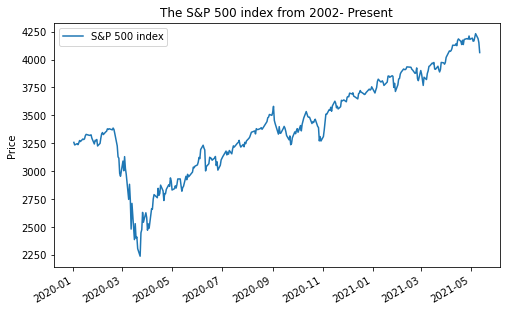

array([[<AxesSubplot:xlabel='Date'>],
       [<AxesSubplot:xlabel='Date'>]], dtype=object)

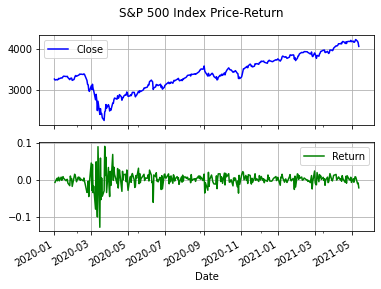

In [18]:
# Price-(Log)Return Relationship

sp500['Return'] = np.log(sp500['Close']/sp500['Close'].shift(1))

sp500[['Close','Return']].plot(kind='line', subplots=True, grid=True, title="S&P 500 Index Price-Return",
        layout=(2, 1), sharex=True, sharey=False, legend=True,style=['b','g'])

### The S&P 500 index consists of the following 500 companies by weight 




These are the 10 largest companies in the S&P 500 index, in order of weighting are:

In [2]:
weights = pd.read_csv('C:/Users/K/Desktop/finance/weight2.csv')
weights.head(10)

,Company,Weight
0,Apple Inc.,5.65
1,Microsoft Corporation,5.28
2,Amazon.com Inc.,3.93
3,Facebook Inc. Class A,2.10
4,Alphabet Inc. Class A,1.94
5,Alphabet Inc. Class C,1.89
6,Berkshire Hathaway Inc. Class B,1.55
7,JPMorgan Chase & Co.,1.38
8,Tesla Inc,1.35
9,Johnson & Johnson,1.26


The 10 largest companies in the S&P 500 index account for 27.5% of the market capitalization of the S&P 500 index 

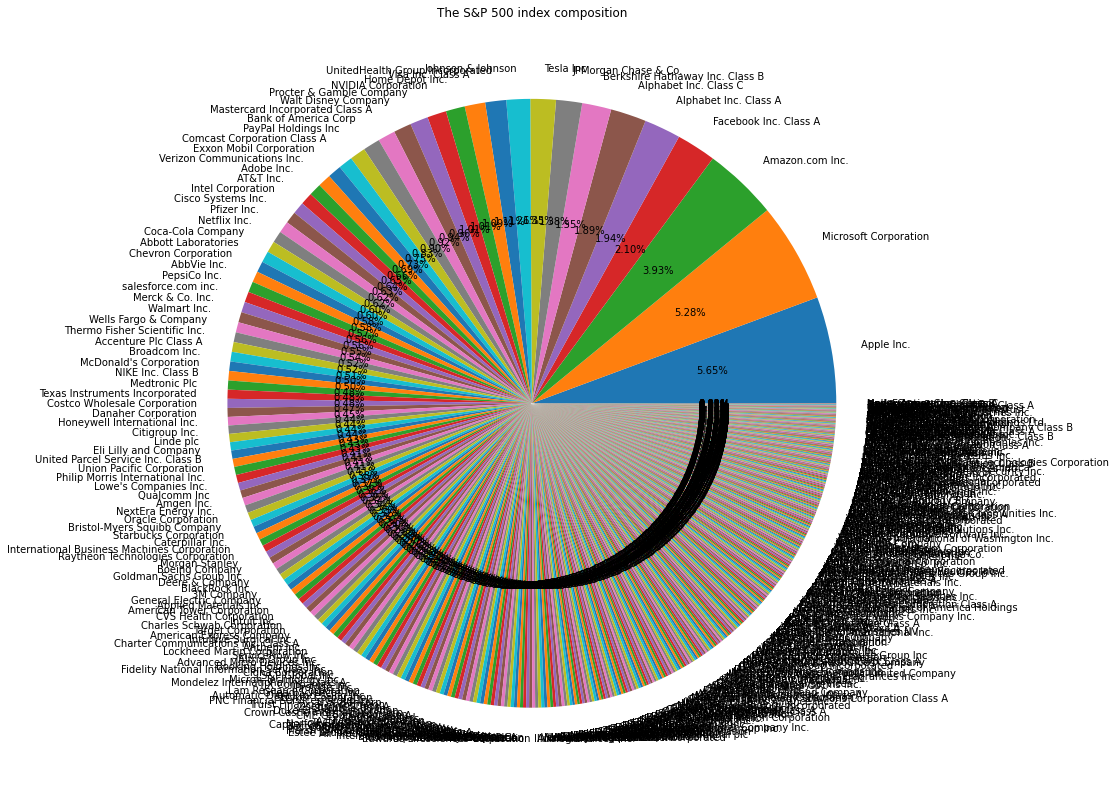

In [10]:
#A very crowded Pie chart

plt.figure(figsize = (14,14))
Company = weights['Company']
Weight = weights['Weight']
plt.pie(Weight, labels=Company, autopct = "%0.2f%%")
plt.title("The S&P 500 index composition")
plt.show()

### Visualization using Tableau 

more @ https://github.com/kyramichel/Tableau

In [21]:
# Tickers list for the 500 stocks contained in the S&P index: 

tickers = ["AAPL","MSFT","AMZN","FB","GOOGL","GOOG","BRK-B","JPM","TSLA","JNJ","UNH","V","HD","NVDA","PG","DIS","MA","BAC","PYPL","CMCSA","XOM","VZ","ADBE","T","INTC","CSCO","PFE","NFLX","KO","ABT","CVX","ABBV","PEP","CRM","MRK","WMT","WFC","TMO","ACN","AVGO","MCD","NKE","MDT","TXN","COST","DHR","HON","C","LIN","LLY","UPS","UNP","PM","LOW","QCOM","AMGN","NEE","ORCL","BMY","SBUX","CAT","IBM","RTX","MS","BA","GS","DE","BLK","MMM","GE","AMAT","AMT","CVS","INTU","SCHW","TGT","AXP","ISRG","CHTR","ANTM","LMT","NOW","MO","AMD","BKNG","FIS","CI","SPGI","MU","MDLZ","TJX","PLD","LRCX","GILD","ADP","SYK","PNC","USB","TFC","ZTS","TMUS","DUK","CCI","CSX","CME","CB","COP","FDX","ATVI","NSC","COF","GM","BDX","CL","SO","SHW","MMC","FISV","ITW","EL","APD","FCX","EQIX","ICE","D","PGR","ADSK","BSX","HUM","ETN","GPN","AON","EMR","NOC","ECL","EW","ILMN","ADI","VRTX","NEM","WM","HCA","NXPI","MCO","REGN","DG","DOW","MET","EOG","KLAC","ROP","JCI","ROST","KMB","F","IDXX","DD","GD","IQV","TEL","LHX","SLB","TT","AIG","EXC","AEP","SYY","BIIB","PPG","BAX","TWTR","HPQ","TROW","SRE","DLR","PSA","PRU","BK","ALGN","EA","ALL","PH","SPG","A","STZ","APH","CNC","TRV","ORLY","CMG","CMI","MCHP","EBAY","MSCI","INFO","WBA","GIS","CTSH","MPC","APTV","MAR","ALXN","XEL","ADM","PSX","CARR","SNPS","YUM","AFL","LUV","CDNS","DFS","CTVA","SWK","KMI","ZBH","GLW","IFF","MSI","WLTW","MNST","HLT","DXCM","AZO","DHI","PCAR","TDG","FRC","PXD","SBAC","PAYX","VLO","OTIS","MCK","PEG","AME","CTAS","ROK","WMB","WELL","WEC","NUE","FAST","SIVB","STT","AMP","XLNX","BLL","WY","FITB","KR","EFX","MTD","LYB","ES","CBRE","AJG","VRSK","DAL","LEN","RMD","KHC","BBY","KSU","FTNT","AWK","ANSS","DTE","SWKS","VFC","AVB","ED","LH","DLTR","ZBRA","KEYS","EQR","VMC","ODFL","CPRT","MXIM","WST","HSY","O","NTRS","IP","URI","SYF","FTV","OKE","CDW","EXPE","MLM","CERN","TSN","CLX","VIAC","FLT","RSG","HIG","PPL","ARE","MKC","TSCO","EIX","HES","VRSN","KEY","CHD","DOV","RF","ETR","XYL","ETSY","GRMN","CZR","HPE","WDC","MTB","CFG","AEE","CCL","OXY","GWW","TER","FE","HAL","VTR","KMX","IT","EXPD","WAT","QRVO","AMCR","TTWO","CE","TRMB","GNRC","COO","BR","GPC","EXR","ESS","ALB","TFX","CAG","LVS","NDAQ","DGX","CMS","VTRS","J","AKAM","AVY","BKR","MAA","OMC","IR","DRI","ANET","RCL","CINF","ABC","PEAK","POOL","ULTA","STE","EMN","STX","NVR","CTLT","K","NTAP","IEX","MKTX","DRE","AES","UAL","MAS","HOLX","CAH","PFG","DPZ","RJF","WRK","TYL","HBAN","MGM","PHM","LB","PAYC","TDY","PKI","WHR","ENPH","BXP","DVN","TXT","FMC","FBHS","INCY","SJM","JBHT","PKG","CTXS","XRAY","FANG","LNT","BF-B","EVRG","WAB","LDOS","LUMN","LKQ","PTC","UDR","PWR","SNA","MPWR","NLOK","AAP","AAL","HRL","CHRW","WYNN","CNP","L","MHK","TPR","FOXA","BIO","ATO","ABMD","ALLE","IPG","HWM","HAS","PENN","BWA","LNC","MOS","IRM","UHS","HST","JKHY","LYV","CBOE","CF","HSIC","DISH","LW","PNR","FFIV","WRB","NWL","TAP","NWSA","CMA","RE","WU","IVZ","REG","CPB","RHI","NCLH","NLSN","NI","GL","PNW","ZION","AOS","DISCK","BEN","KIM","MRO","AIZ","DVA","JNPR","SEE","DXC","HII","NRG","ROL","ALK","PBCT","APA","PVH","FRT","FLIR","LEG","GPS","VNO","COG","IPGP","HBI","NOV","RL","UNM","DISCA","PRGO","FOX","HFC","UAA","UA","NWS"]

In [22]:
def get_price(stock, start, end):
    return pdr.get_data_yahoo(stock, start, end)['Close']

prices = pd.DataFrame({n: get_price(n, "2020-05-01", "2021-05-12") for n in tickers})

In [26]:
prices.tail()

,AAPL,MSFT,AMZN,FB,GOOGL,GOOG,BRK-B,JPM,TSLA,JNJ,...,NOV,RL,UNM,DISCA,PRGO,FOX,HFC,UAA,UA,NWS
Date,,,,,,,,,,,,,,,,,,,,,
2021-05-06,129.740005,249.729996,3306.370117,320.019989,2337.350098,2381.350098,289.709991,160.690002,663.539978,167.740005,...,16.639999,134.000000,30.049999,36.250000,42.650002,36.700001,35.330002,24.700001,20.440001,23.940001
2021-05-07,130.210007,252.460007,3291.610107,319.079987,2351.929932,2398.689941,290.929993,161.240005,672.369995,168.500000,...,17.250000,139.639999,29.889999,37.560001,42.959999,37.169998,35.650002,24.469999,20.240000,25.370001
2021-05-10,126.849998,247.179993,3190.489990,305.970001,2291.750000,2341.659912,292.329987,161.220001,629.039978,170.270004,...,17.160000,137.570007,30.309999,37.259998,43.119999,37.250000,35.130001,23.190001,19.270000,25.260000
2021-05-11,125.910004,246.229996,3223.909912,306.529999,2270.060059,2308.760010,285.630005,158.539993,617.200012,168.880005,...,16.959999,134.050003,29.879999,36.779999,44.340000,37.389999,34.209999,23.040001,19.190001,25.639999
2021-05-12,122.769997,239.000000,3151.939941,302.549988,2200.250000,2239.080078,282.910004,157.449997,589.890015,168.199997,...,16.950001,128.039993,29.020000,35.759998,45.759998,36.490002,34.490002,22.030001,18.350000,24.240000


## Selection Criterion


The selection criteria used is market capitalization.

The companies are weighted in the index in proportion to their market capitalizations i.e., companies with higher weight percentage allocation have larger market capitalization


### Weighting Formula for S&P 500


$\text{Company's weight in S&P 500}= \frac{\text{Company's market cap}}{\text{Total of all market caps}}$


### Using market capitalization formula:

$\text{Market cap} = P\times Q$, where $P$ = share price  and $Q$ = # shares outstanding

### We get the formula for the weight of a company in the S&P 500 index (i=1..500):

$\text{Index Weighting for the i-th company} = \frac{P_{i}\times Q_{i}}{\sum{P_{i}\times Q_{i}}}$,

where $P_{i}$ = price of the i-th compamy in the index and $Q_{i}$ = number of shares publicly available for the i-th compamy



## PCA algorithm
    

Before using PCA, standardize data:

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#i.e., all 30 dimensions are centered around 0 and have a std=1
standardize= lambda x: (x-x.mean())/x.std()


In [24]:
pca = KernelPCA().fit(prices.apply(standardize))

Next, calculate the covariance matrix for the resulting centered matrix and use eigenvalue decomposition to transform it 

Eigenvalues

In [27]:
#Eigenvalues in decreasing order

pca.lambdas_

array([8.95824838e+04, 1.39599936e+04, 8.18083827e+03, 3.93419981e+03,
       2.92442182e+03, 1.95044934e+03, 1.44625363e+03, 1.06787602e+03,
       8.74192119e+02, 7.30509703e+02, 5.73652452e+02, 5.19745694e+02,
       4.85277091e+02, 4.01200024e+02, 3.41237295e+02, 2.97267101e+02,
       2.34459110e+02, 2.20568552e+02, 1.96095773e+02, 1.80579822e+02,
       1.45887039e+02, 1.35721060e+02, 1.21961599e+02, 1.20479709e+02,
       1.04331750e+02, 9.57734162e+01, 9.27279883e+01, 8.46126614e+01,
       8.35281999e+01, 7.56389670e+01, 7.12701120e+01, 6.27816994e+01,
       5.84164236e+01, 5.61246178e+01, 5.41718475e+01, 5.08447123e+01,
       4.62455402e+01, 4.42592115e+01, 4.22061641e+01, 3.97162231e+01,
       3.86536348e+01, 3.70027112e+01, 3.52742656e+01, 3.30432986e+01,
       3.15256207e+01, 3.02775253e+01, 2.91166335e+01, 2.62427109e+01,
       2.53130690e+01, 2.43313575e+01, 2.31988030e+01, 2.25042869e+01,
       2.12557349e+01, 2.03623623e+01, 1.89258778e+01, 1.83648072e+01,
      

## Explained Variance

The first Principal Component alone accounts for 68% percent of the variance in the 500 time series:

In [34]:
normalize= lambda x:x/x.sum()
normalize(pca.lambdas_)[:10]

array([0.68490756, 0.10673186, 0.06254703, 0.03007913, 0.02235882,
       0.01491226, 0.01105741, 0.0081645 , 0.00668368, 0.00558515])

In [35]:
eig_vals = normalize(pca.lambdas_)[:10]
for i in eig_vals:
    print(i)

0.6849075561602682
0.10673185986859468
0.0625470259950377
0.030079130008184355
0.022358819695594584
0.014912262245354817
0.011057407633047387
0.008164501854602517
0.006683681478972024
0.005585150068571962


The first 10 Principal Components combined explain 95.3% of the variability:

In [36]:
tot = sum(eig_vals)
tot

0.9530273950082283

### Pareto Chart

Pareto chart contains a bar & line graph where individual components are represented in descending order by bars and 
the cumulative total is represented by the line. 

Pareto principle:

As we saw, the 10 largest companies in the S&P 500 index account for 27.5% of the market capitalization of the S&P 500 index. 

On the Pareto chart below (adopted from S.R.) it's easy to see that the first Principal Component alone accounts for more than 68% of the variability, and that the first few PC explain most of the variance in the 500 time series.

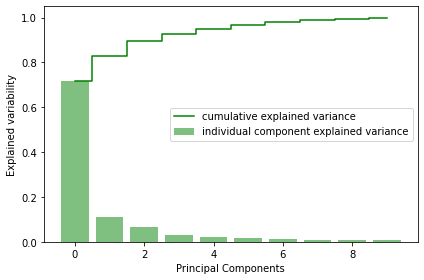

In [40]:
var = [(i/tot) for i in eig_vals]
cum = np.cumsum(var)

plt.bar(range(10), var, alpha=0.5, align='center', color = 'g', label='individual component explained variance')
plt.step(range(10), cum, where='mid', color = 'g', label='cumulative explained variance')
plt.ylabel('Explained variability')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()


In [41]:
pca = KernelPCA(n_components=10).fit(prices.apply(standardize))
PC10 = pca.transform(-prices)
w =normalize(pca.lambdas_)
prices['PCA_10'] = np.dot(PC10, w)

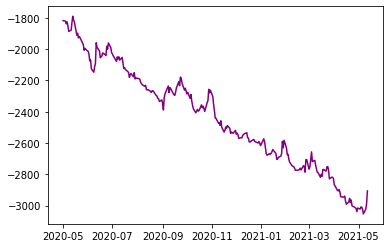

In [42]:
#PC_10

plt.plot(prices['PCA_10'], color='purple')

### Limitations of market-cap weighted index criterion:


When stocks in the index (S&P 500 or Dow Jones) become overvalued, they can inflate the overall value or price of the index.